# DIABETES PATIENTS PREDICTION

## Information about the dataset

- **Pregnancies**: The number of pregnancies a woman has had can be a risk factor for gestational diabetes, a type of diabetes that develops during pregnancy. Multiple pregnancies or a history of gestational diabetes can increase the risk of developing type 2 diabetes later in life.

- **Glucose**: Elevated blood glucose levels are a hallmark of diabetes. In people with diabetes, the body has difficulty regulating blood sugar levels, leading to higher-than-normal glucose levels. Glucose monitoring is essential for diabetes management, and maintaining blood glucose within a target range is a key goal.

- **Blood Pressure**: High blood pressure, or hypertension, is a common comorbidity of diabetes. People with diabetes are at an increased risk of developing high blood pressure, and hypertension can exacerbate the complications associated with diabetes, such as heart disease and kidney problems.

- **Skin Thickness**: While skin thickness itself is not directly related to diabetes, it may impact the accuracy of certain diabetes-related tests, such as skinfold thickness measurements used to estimate body fat percentage in calculating BMI. However, skin thickness is not a primary indicator or risk factor for diabetes.

- **Insulin**: Insulin is a hormone produced by the pancreas that regulates blood sugar levels. In type 1 diabetes, the body doesn't produce insulin, while in type 2 diabetes, the body becomes resistant to insulin. Many people with diabetes require insulin therapy to manage their blood sugar levels.

- **BMI (Body Mass Index)**: BMI is a measure of body fat based on a person's weight and height. Higher BMI is often associated with an increased risk of type 2 diabetes. Obesity, which is often indicated by a high BMI, is a significant risk factor for the development of type 2 diabetes.

- **Diabetes Pedigree Function**: The Diabetes Pedigree Function is a mathematical function used to assess the hereditary risk of developing diabetes. It takes into account the family history of diabetes, which can be an important indicator of a person's risk for developing the condition.

- **Age**: Age is a significant risk factor for type 2 diabetes. The risk of developing diabetes increases with age, and older adults are more susceptible to the disease. This is often due to lifestyle factors and the natural aging process.

- **Diabetes/Outcome**: This variable likely refers to the presence or absence of diabetes, with "Outcome" indicating whether an individual has been diagnosed with diabetes. It's a binary outcome variable used in statistical analysis to understand the relationship between various predictors (such as the other factors on this list) and the likelihood of having diabetes.

## Steps
**Libraries Importation**:
In this step, we import the necessary Python libraries that we'll use throughout your data analysis. Common libraries we used include pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for data visualization, and scikit-learn for machine learning.

- **Data Loading**: We load our dataset into your Python environment. This dataset likely contains information about individuals and their health, including features like age, glucose levels, blood pressure, etc. Loading the data is the first step to start working with it.

- **Data Preprocessing**: Data preprocessing involves several tasks, such as handling missing values, dealing with outliers, transforming and splitting the data into training and testing sets. This step ensures that our data is clean, properly formatted, and ready for analysis.

- **Exploratory Data Analysis (EDA)**: EDA is a crucial step in understanding our dataset. It involves generating summary statistics, visualizations, and insights about the data. We explore the distribution of variables, correlations between features, and identify patterns or trends.

- **Modeling**: In the modeling phase, We build machine learning models to predict or analyze diabetes outcomes. We choose appropriate algorithms, split the data into training and testing sets, and train the models on the training data. The goal is to find a model that can accurately predict diabetes outcomes.

- **Evaluation and Interpretation**:After training your models, we evaluate the performance using various metrics, such as accuracy, precision, recall, and F1-score for classification tasks. Interpretation involves understanding the model's behavior, identifying important features, and assessing model biases or limitations.

- **Conclusion**: In the conclusion phase, We summarize our findings and insights from the analysis.

## Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
shp = data.shape
print(f"The number of rows and columns respectively {shp}")

The number of rows and columns respectively (768, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Preprocessing

In [6]:
#Lets check the number of missing values in columns 
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Lets check for duplicates values in the dataset
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Exploratory Data Analysis (EDA)

In [8]:
# Lets briefly describe the dataset to get some statistical knowledge about the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


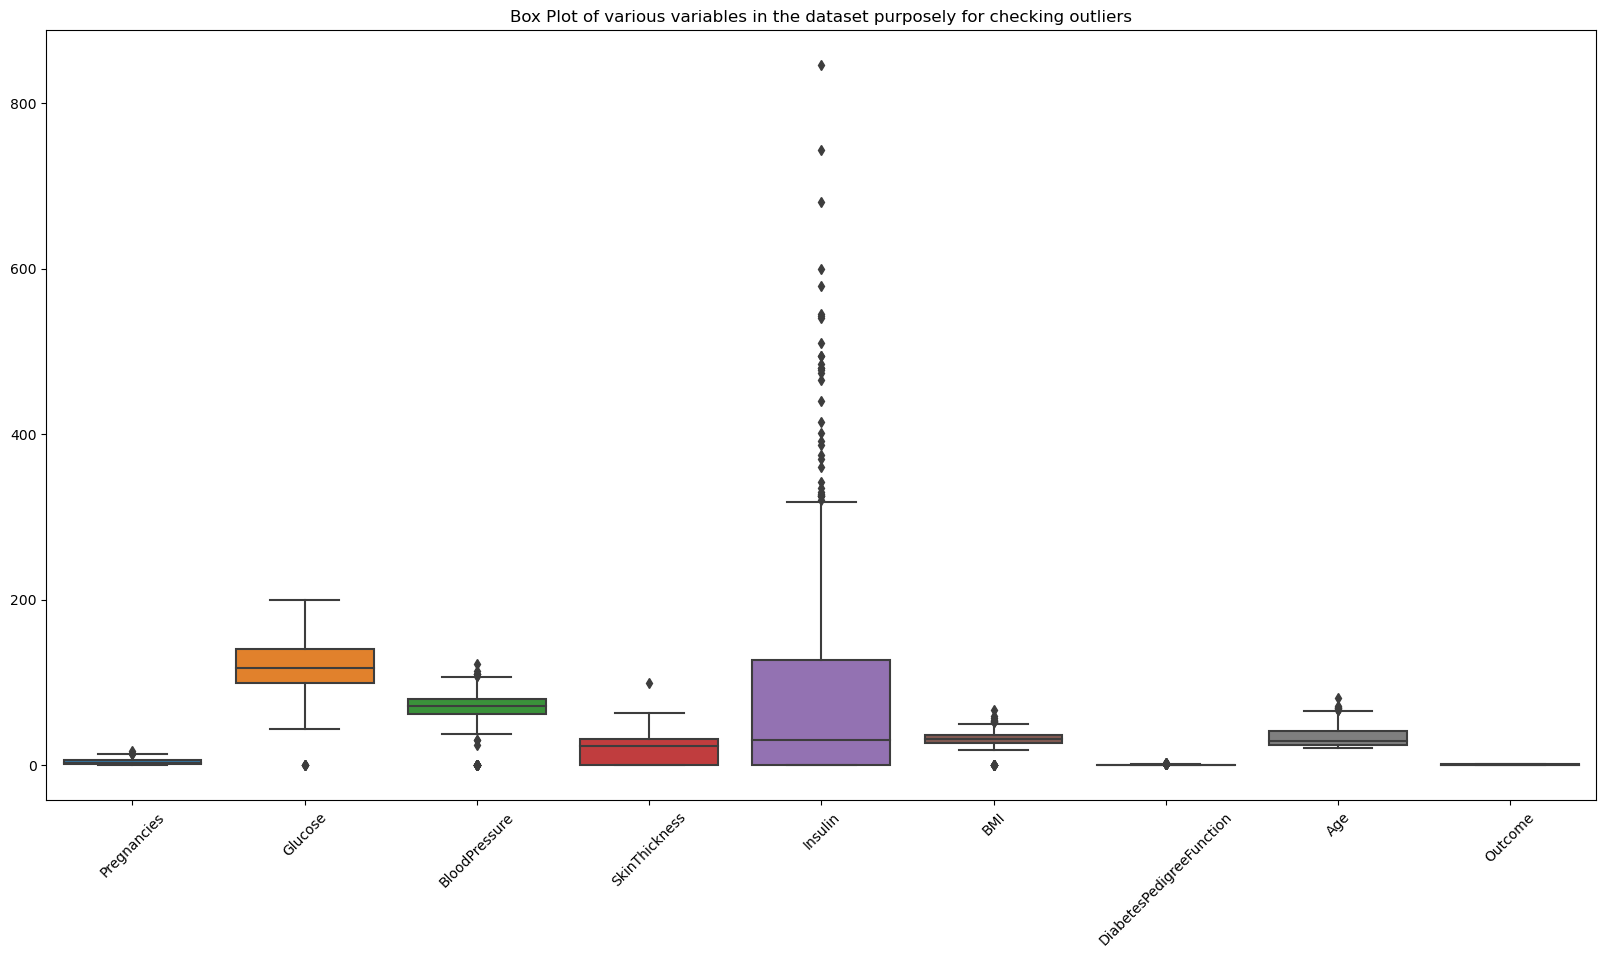

In [9]:
# Lets create a boxplot using Matplotlib and Seaborn purposely for checking outliers
plt.figure(figsize=(20, 10))  # Set the figure size
plt.title("Box Plot of various variables in the dataset purposely for checking outliers")
sns.boxplot(data=data)
plt.xticks(rotation = 45)
# Show the plot
plt.show()

- So from the above diagrams we can identify outliers on most data points that deviate significantly from the majority of the data in a dataset. These extreme values can have various effects on a dataset and the analysis or modeling process, both positive and negative, such as skewing statistical measures, misleading visualizations, influencing correlations, bias in machine learning models. So we have to deal with them in our next step.

In [10]:
#Lets create a function using interquantiles to remove outliers from various variables in the dataset
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

data = remove_outlier(data, "Pregnancies")
data = remove_outlier(data, "BloodPressure")
data = remove_outlier(data, "SkinThickness")
data = remove_outlier(data, "BMI")
data = remove_outlier(data, "Age")
data = remove_outlier(data, "Glucose")
data = remove_outlier(data, "Insulin")
data = remove_outlier(data, "DiabetesPedigreeFunction")

In [11]:
# Lets create a copy of our original datset
data_clean= data.copy()

In [12]:
# Lets group the variable outcome to check the number of (No-diabetes(0)/Yes-diabetes(1))
data_clean.groupby(["Outcome"]).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,442,442,442,442,442,442,442,442
1,201,201,201,201,201,201,201,201


- From the above table we can varify that most are not diabetic. The ratio is almost 1:2 in favour of class 0. So we propose that the model ability to predict class 0,will be better than predicting class 1.

In [13]:
data_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Bivariate Data Analysis

<Axes: xlabel='Pregnancies', ylabel='Count'>

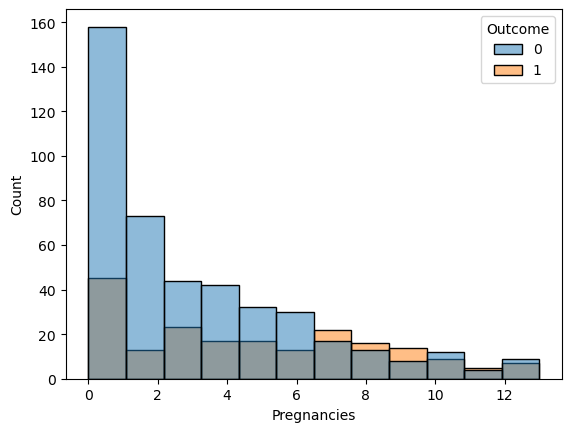

In [14]:
#Lets create a histogram for pregnancies and it effect on diabetes
sns.histplot(data_clean,x = data_clean['Pregnancies'],hue = 'Outcome')

In [15]:
# Lets check on the chances of get diabetes base on the number of pregnancies
i=0
while i<=14:
    total = len(np.where((data_clean['Pregnancies'] == i))[0])
    out_zero = len(np.where((data_clean['Pregnancies'] == i) & (data_clean['Outcome'] == 0) == True)[0])
    out_one = total - out_zero
    if total !=0:
        print('Chances of diabetes at',i,'Pragnencies is :',round((out_one/total)*100,2), '%')
    else:
        print('Chances of diabetes at',i,'Pragnencies is : No Data Avalibale')
    i+= 1

Chances of diabetes at 0 Pragnencies is : 27.27 %
Chances of diabetes at 1 Pragnencies is : 18.26 %
Chances of diabetes at 2 Pragnencies is : 15.12 %
Chances of diabetes at 3 Pragnencies is : 34.33 %
Chances of diabetes at 4 Pragnencies is : 28.81 %
Chances of diabetes at 5 Pragnencies is : 34.69 %
Chances of diabetes at 6 Pragnencies is : 30.23 %
Chances of diabetes at 7 Pragnencies is : 56.41 %
Chances of diabetes at 8 Pragnencies is : 55.17 %
Chances of diabetes at 9 Pragnencies is : 63.64 %
Chances of diabetes at 10 Pragnencies is : 42.86 %
Chances of diabetes at 11 Pragnencies is : 55.56 %
Chances of diabetes at 12 Pragnencies is : 44.44 %
Chances of diabetes at 13 Pragnencies is : 42.86 %
Chances of diabetes at 14 Pragnencies is : No Data Avalibale


<Axes: xlabel='Outcome', ylabel='Glucose'>

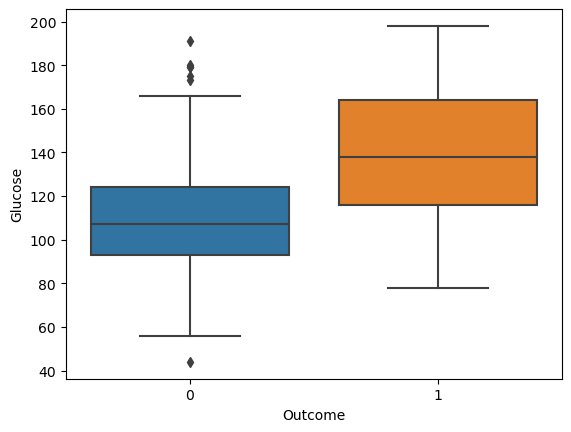

In [16]:

sns.boxplot(data=data_clean,y = data_clean['Glucose'],x = data_clean['Outcome'])

- From the diagram above shows that probability of getting diabetes is higher when the glucose level is above 120

<Axes: xlabel='Outcome', ylabel='Age'>

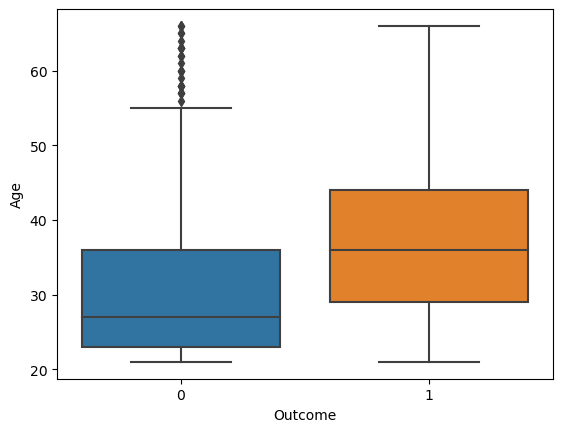

In [17]:
sns.boxplot(data=data_clean,y = data_clean['Age'],x = data_clean['Outcome'])

- Higher the mean age higher the chance of getting diabetes base on the diagram above, between the ages of 40 and above has much more tendency to get diabites.

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

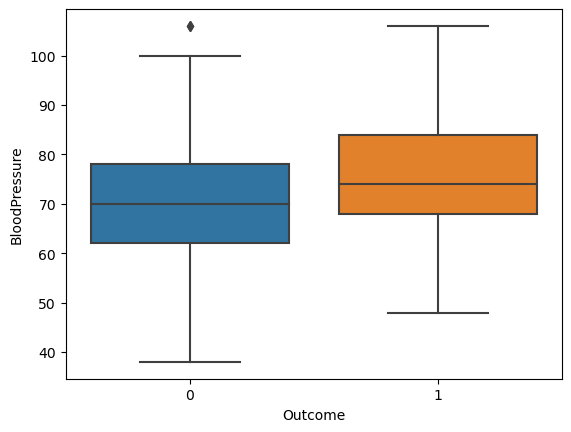

In [18]:
sns.boxplot(data=data_clean,y = data_clean['BloodPressure'],x = data_clean['Outcome'])

- Base on the above diagram BloodPressure will not affect the chances of having diabetes that much.

<Axes: xlabel='Outcome', ylabel='BMI'>

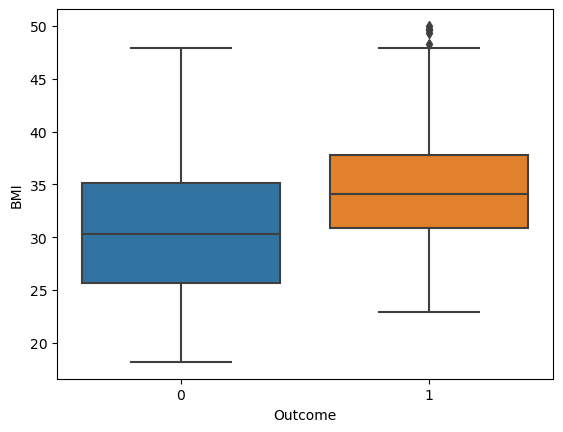

In [19]:
sns.boxplot(data=data_clean,y = data_clean['BMI'],x = data_clean['Outcome'])

- As we can observe above, BMI level from 25 to 30 gives lower chances of getting diabetes, where as BMI level of above 30 has higher chances of getting diabetes

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

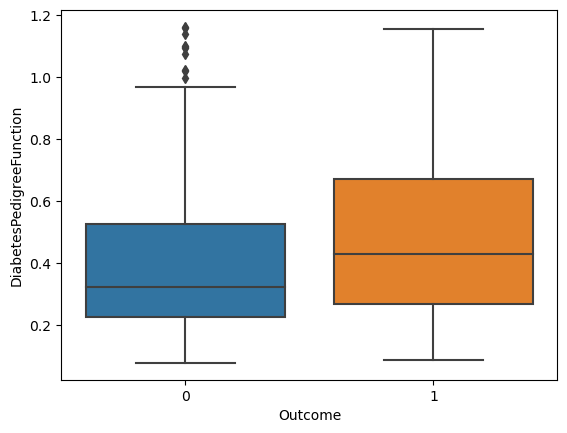

In [20]:
sns.boxplot(data=data_clean,y = data_clean['DiabetesPedigreeFunction'],x = data_clean['Outcome'])

- The diagram above shows that DPF has not that much effect on outcome.

<Axes: xlabel='Outcome', ylabel='Insulin'>

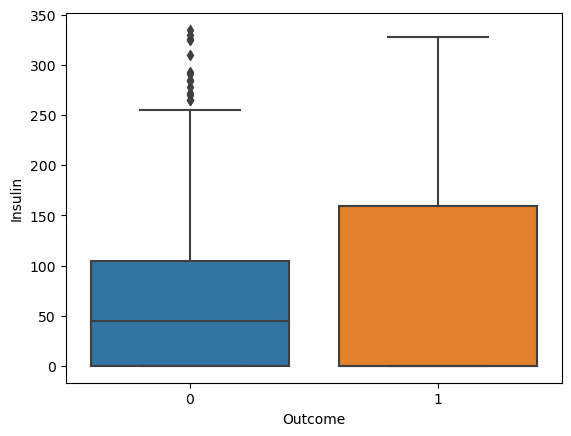

In [21]:
sns.boxplot(data=data_clean,y = data_clean['Insulin'],x = data_clean['Outcome'])

- Elevated insulin levels are associated with an increased predisposition to diabetes based on the diagrame above.

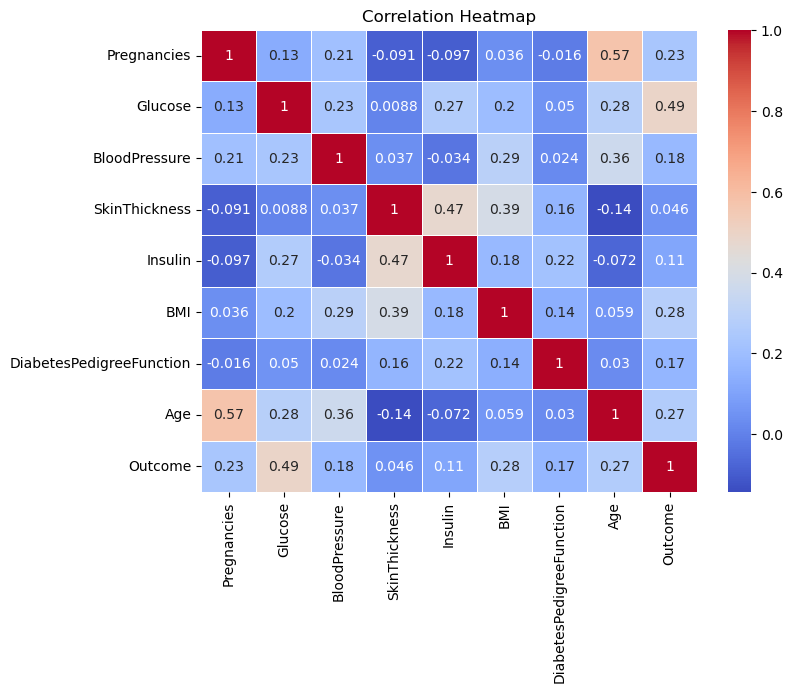

In [22]:
correlation_matrix = data_clean.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
# Set the plot title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

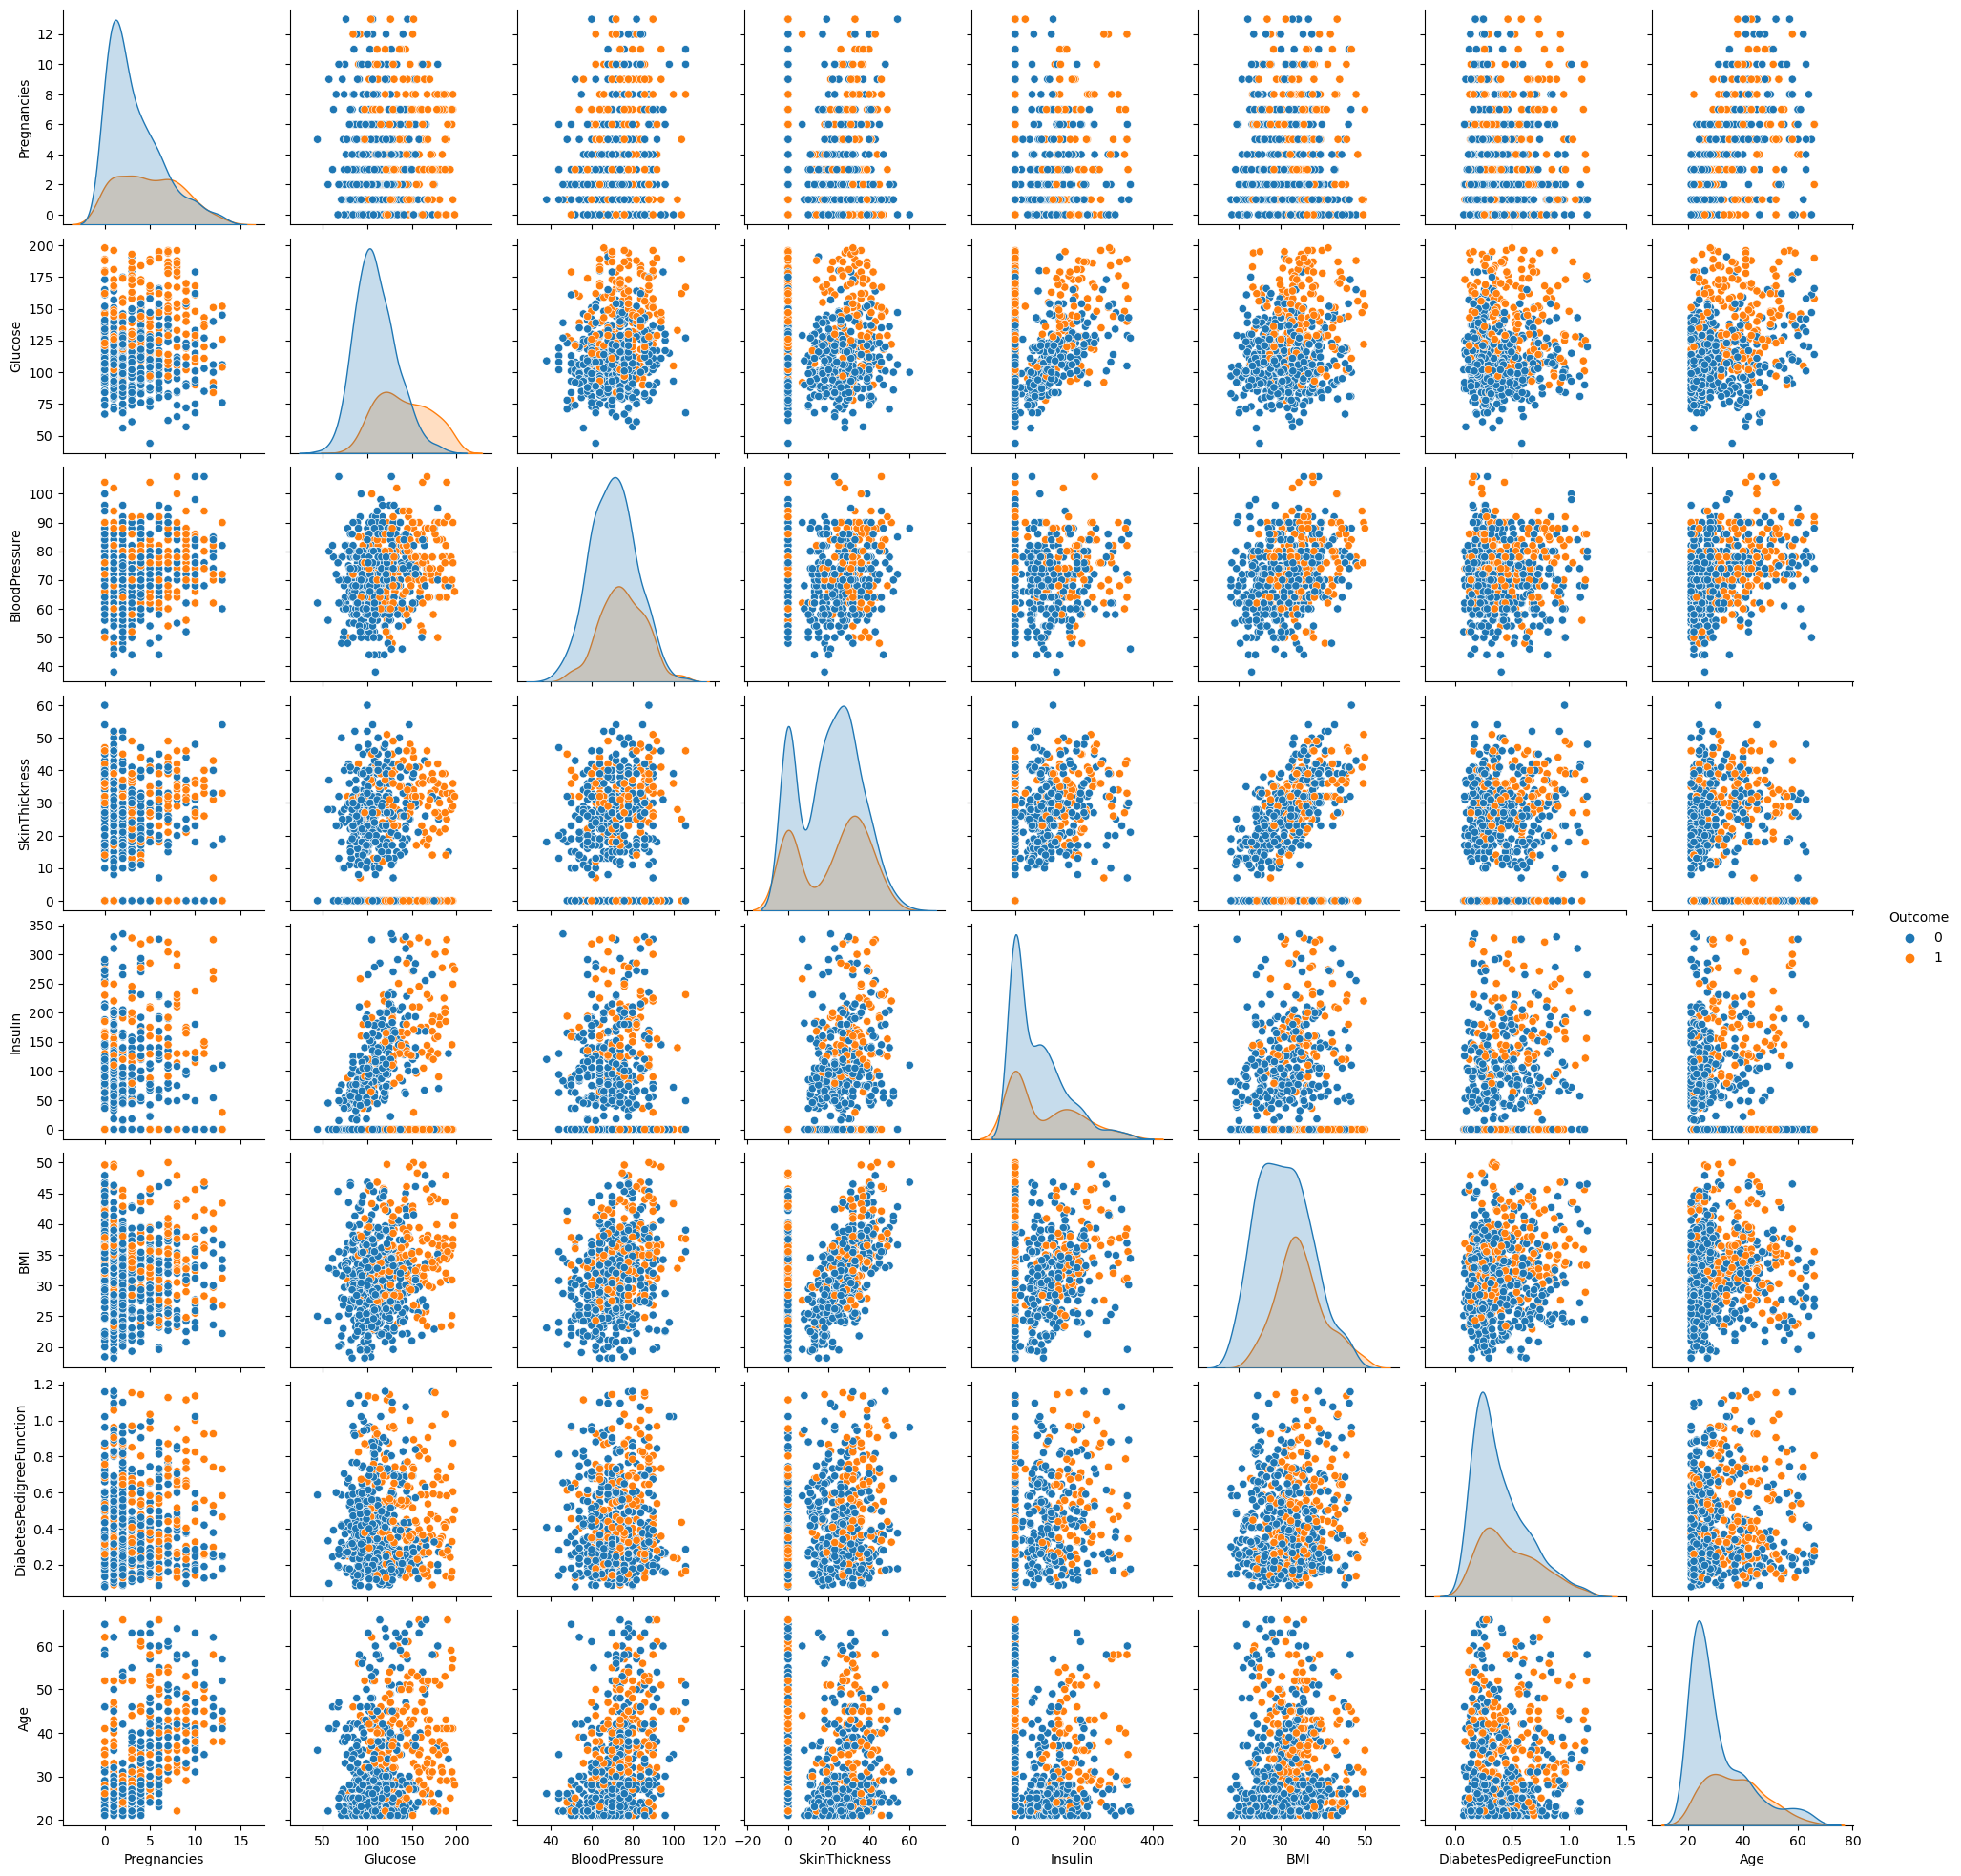

In [23]:
sns.pairplot(data_clean, diag_kind = "kde", hue = "Outcome")

In [43]:
# lets reset the index of the datset
data_1 = data_clean.reset_index()

In [25]:
# Lets convert all the dataframe into array
array = data_1.values

In [44]:
X = array[:, 1:8] # Lets select all rows and first 8 columns which are the attributes
y = array[:, 9] # Lets select all rows, which and the 9th is the classification "YES", "NO" for diabetes
f"Shape of x = {X.shape} y = {y.shape} #Diabetic Cases {y.sum()}" # the shape contain total rows and columns

'Shape of x = (643, 7) y = (643,) #Diabetic Cases 201.0'

In [46]:
y = array[:, 9]

In [47]:
# Create an instance of RandomOverSampler
ros = RandomOverSampler()

# Fit and transform your data to oversample the minority class
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Original dataset shape", Counter(y))
print("Resample dataset shape", Counter(y_resampled))

Original dataset shape Counter({0.0: 442, 1.0: 201})
Resample dataset shape Counter({1.0: 442, 0.0: 442})


In [48]:
test_size = 0.30 # Taking 70:30 training and test set
seed = 10 # Random number for repeatability of the code

### Train Test Split

In [49]:
X_train,x_test,y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = test_size, random_state = seed)

### Logistics Regression Model

**Logistic regression** is chosen as a modeling technique based on its assumptions, which align with the characteristics of the data and the nature of the problem being addressed. Here are some key reasons for choosing logistic regression based on its assumptions:

- **Binary Outcome**: Logistic regression is well-suited for binary classification problems where the outcome variable is categorical and has two classes. For example, in medical studies, you often have binary outcomes such as "Yes" or "No" for disease presence, making logistic regression an appropriate choice.

- **Linearity of Log Odds**: Logistic regression assumes that the log-odds of the outcome variable is a linear combination of the predictors. This assumption is reasonable when you believe that the relationship between the predictors and the log-odds of the outcome is roughly linear, which is often the case in practice.

- **Independence of Observations**: Logistic regression assumes that observations are independent of each other. This is appropriate in scenarios where the observations are not influenced by each other and can be treated as independent events. For example, in a clinical study, each patient's outcome is generally independent of other patients' outcomes.

- **No or Little Multicollinearity**: Logistic regression assumes that there is minimal multicollinearity, meaning that predictor variables are not highly correlated with each other. High multicollinearity can make it challenging to interpret the influence of individual predictors.

- **Large Sample Size**: Logistic regression tends to perform well with a relatively large sample size. The more data you have, the more stable and reliable the estimated coefficients and model performance are likely to be.

- **Adequate Events per Predictor**: Logistic regression may require an adequate number of events (instances of the positive outcome) relative to the number of predictor variables. Having too few events compared to predictors can lead to unstable or unreliable estimates.

- **No Extreme Outliers**: Logistic regression assumes that there are no extreme outliers that could disproportionately influence the model's estimates. It's important to check for outliers and potentially address them before applying logistic regression.

- **Assumption of No Endogeneity**: Logistic regression assumes that there is no endogeneity, meaning that predictors are not influenced by the outcome. Violating this assumption can introduce bias into the model.

- **Continuous or Categorical Predictors**: Logistic regression can handle both continuous and categorical predictors, making it versatile in accommodating various types of data.

In [50]:
model = LogisticRegression(max_iter=1000)

### Model fitting and Scoring

In [51]:
model.fit(X_train, y_train)
model.score(x_test, y_test)

0.7518796992481203

### Model Prediction

In [52]:
y_pred = model.predict(x_test)

### Model Evaluation

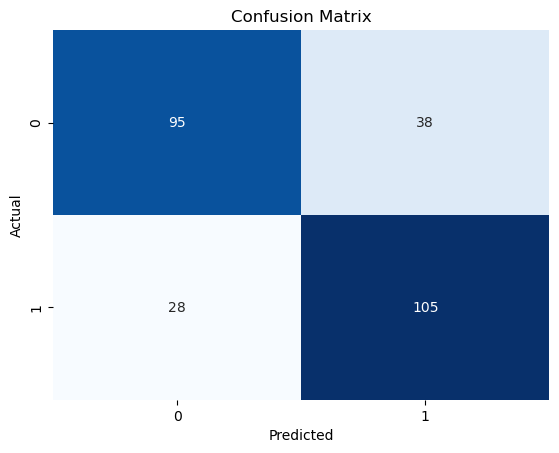

In [53]:
confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [54]:
cl_report = classification_report(y_test, y_pred)
print(cl_report)
print("Accuracy is :", ((95+105)/(95+38+28+105))*100)

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74       133
         1.0       0.73      0.79      0.76       133

    accuracy                           0.75       266
   macro avg       0.75      0.75      0.75       266
weighted avg       0.75      0.75      0.75       266

Accuracy is : 75.18796992481202


### Hyperparameter Tuning with GridSearchCV

In [65]:
logreg = LogisticRegression(max_iter=1000,tol=1e-5,random_state = 50)
param_grid = {
    "C": [0.001, 0.01, 1, 100, 1000, 10000],
    "penalty" : ["l1", "l2"],
    "solver"  : ["liblinear", "saga"]
}


grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [68]:
best_logreg_model = LogisticRegression(max_iter = 1000, random_state = 50, C =1, penalty = "l1", solver = "liblinear")
best_logreg_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=50,
                   solver='liblinear')

In [69]:
best_logreg_model.score(x_test, y_test)

0.7556390977443609

In [70]:
y_pred = best_logreg_model.predict(x_test)
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[ 96,  37],
       [ 28, 105]], dtype=int64)

In [71]:
cl_report = classification_report(y_test, y_pred)
print(cl_report)
print("Accuracy is :", ((96+106)/(96+37+28+105))*100)

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75       133
         1.0       0.74      0.79      0.76       133

    accuracy                           0.76       266
   macro avg       0.76      0.76      0.76       266
weighted avg       0.76      0.76      0.76       266

Accuracy is : 75.93984962406014


# CONCLUSION

In conclusion, the analysis of the diabetes prediction model provides valuable insights into the factors affecting the likelihood of diabetes development. Outliers in the data were identified as having both positive and negative effects on the analysis and modeling process, emphasizing the need to address them in subsequent steps. The two sets of evaluation metrics for the baseline logistic regression model and the GridSearchCV hyperparameter-tuned model are identical. This suggests that the hyperparameter tuning performed by GridSearchCV did not result in any significant improvement in the model's performance over the baseline logistic regression model.

Both models have an accuracy of 0.76, indicating that 76% of the predictions are correct. The precision, recall, and F1-score for both classes (0 and 1) are also the same in both models, suggesting that the ability of the models to correctly classify both classes is similar.

In summary, based on the provided evaluation metrics, it appears that the hyperparameter tuning using GridSearchCV did not lead to any noticeable improvement in model performance compared to the baseline logistic regression model. Additional analysis and potentially different hyperparameter settings may be needed to achieve better results..

Furthermore, the analysis highlighted specific factors that influence the likelihood of diabetes. The probability of diabetes increases with higher glucose levels, indicating the importance of monitoring blood glucose. Age also plays a significant role, with individuals aged 40 and above having a higher tendency to develop diabetes. Blood pressure, on the other hand, appears to have a less pronounced effect on diabetes risk.

Body Mass Index (BMI) is another crucial factor, with a BMI above 30 associated with a higher risk of diabetes. The Diabetes Pedigree Function (DPF) appears to have a limited effect on the outcome. Finally, the analysis supports the notion that elevated insulin levels are associated with an increased predisposition to diabetes.

Logistic regression was chosen as the modeling technique due to its suitability for binary classification problems and alignment with the assumptions of the data. The strengths of logistic regression, including balanced precision, recall, F1-scores, and accuracy, were discussed. Logistic regression's ability to handle binary outcomes, linearity of log odds, independence of observations, and suitability for large sample sizes were also emphasized.

In summary, the analysis provides a comprehensive understanding of the diabetes prediction problem and the choice of logistic regression as the modeling technique, setting the stage for further model development and evaluation to enhance the accuracy and reliability of diabetes predictions.

Useful scientific publications links for further reading on logistic regression in medical decision making;

(https://repub.eur.nl/pub/38819/)

(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6465431/)

(https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0262193)
